<h1><center><span style="color:#C2571A"> Detect hotel amenities based on rooms photos</span></center></h1>
<h2><center><span style="color:#C2571A"> Computer Vision. Training custom object-detection YoloV5 model</span></center></h1>

## 1. Project Motivation <a name="1"></a>

In this project we will research a possibility of implementing an improvement for a platform with accommodation offers (hotels, apartments, private room renting) which will allow to extend a standard list of amenities provided by a hotel for a specific room. The idea is to process images of a room and detect specific object of interest, for example: swimming pool, desk, kitchen, coffeemaker, TV, bathtub, balcony, garden, etc. This is the first version of amenities to predict and it is to be extended and refined in the next steps.

Results of this project can be useful as a hotel can provide not full information in the list of amenities. It’s also possible that different hotels can have different standards about what to include in the list. 

To improve experience of potential customers who want to book an accommodation, we want to create an extended, searchable and standardized among all hotel list of amenities.  

## 2. The Dataset <a name="2"></a>

For training of custom object-detection YoloV5 model we will use `Open Google Data Set v4`. 
For preliminary evaluation of model results we will use a sample of real hotel photos which will be used in production to predict hotel amenities. 


## 3. Analysis Plan  <a name="3"></a>

The task of this project is supervised machine learning problem that can be solved the best with deep learning methods. 
In this project following steps were performed:
- Define model types that can be used to solve the given task: supervised image Classification and Object detection;
- Assess if existing pre-trained Object detection model can solve the task: check if the list of pre-trained classes contain all necessary classes to be predicted and manually check model predictions on the sample of real hotel photos;
- Assess if existing pre-trained image Classification model can solve the task: check if the list of pre-trained classes contain all necessary classes to be predicted and manually check model predictions on the sample of real hotel photos;
- Define model for custom training (object detection YoloV5 model was chosen);
- Define performance metrics to evaluate custom model based on what is known about expected performance;
- Prepare training dataset, train custom model and evaluate the predictions; 
- Summarize received results and next steps to improve the model.


## 4. Model Evaluation methods   <a name="4"></a> 

### 4.1. Performance metrics for Object detection model

**`Precision`** The higher the precision, the more confident the model is when it classifies a sample as Positive. 

**`Recall`** The higher the recall, the more positive samples the model correctly classified as Positive.

**`Precision-recall curve`** Due to the importance of both precision and recall, a precision-recall curve is used to show the trade-off between the precision and recall values for different thresholds. This curve helps to select the best threshold to maximize both metrics. 

Threshold here refers to predicted probability by the model that object belongs to certain class. When making a prediction model converts probability scores into a class label classification and uses a threshold: when probability score is equal to or above the threshold, the sample is classified as one class. Otherwise, it is classified as the other class (or not classified). 

**`Average precision` (AP)** is a way to summarize the precision-recall curve into a single value representing the average of all precisions. Using a loop that goes through all precisions/recalls, the difference between the current and next recalls is calculated and then multiplied by the current precision. 

**`mAP` (mean Average Precision)** calculates mean among Average Precision of all classes predicted. For our case mAP will be equal to Average Precision since we have only one class to predict.

**`IoU` (Intersection over Union metric)** is a quantitative measure to score how the ground-truth and predicted boxes match. The IoU helps to know if a region has an object or not. The IoU is calculated by dividing the area of intersection between the 2 boxes by the area of their union. The higher the IoU, the better the prediction.  Note that the IoU is 0.0 when there is a 0% overlap between the predicted and ground-truth boxes. The IoU is 1.0 when the 2 boxes fit each other 100%.

To objectively judge whether the model predicted the box location correctly or not, a threshold is used. If the model predicts a box with an IoU score greater than or equal to the threshold, then there is a high overlap between the predicted box and one of the ground-truth boxes. This means the model was able to detect an object successfully. The detected region is classified as Positive (i.e. contains an object).

On the other hand, when the IoU score is smaller than the threshold, then the model made a bad prediction as the predicted box does not overlap with the ground-truth box. This means the detected region is classified as Negative (i.e. does not contain an object).

**`mAP@0.5`** metric refers to Average Precision when IoU is set to 0.5.

**`mAP@0.05:0.95`** metric calculates Average Precision when IoU is set to the range from 0.5 to 0.95. 

More details about described performance metrics for object detection model can be found in this [article](https://www.kdnuggets.com/2021/03/evaluating-object-detection-models-using-mean-average-precision.html).


### 4.2. Evaluation approaches and trade-offs

When evaluating performance of the object-detection model, it’s important to pay attention to two aspects:

1.	Context of the usage. We need to check the performance metrics, but sometimes standard metrics cannot help with certain areas of model evaluation. 

    For example, if IoU (Intersection over Union metric) set to be a threshold of 0.5 and the object detected by the model has overlapping area only of 40%, then such object will not be classified by the model. But how is important for a particular use case accuracy of box limits prediction? For some cases it can be critical, for other cases less important. Note, that some of standard performance metrics for object detection models are calculated for fixed IoU values (`mAP@0.5`, `mAP@0.05:0.95`).

    For our case we need to detect object of interest as accurately as possible and it’s acceptable to have an error margin in box limits, but it shouldn’t be too high as incorrectly defined box limits will lead to errors in predictions of class to witch object belongs. 

2. It’s important to calculate quantitative metrics that can give an objective overview of model performance and allow to compare performance of different models or of the same model before and after tuning. 

    In this project we will calculate the performance metrics for the data obtained from `Open Google Data Set v4` and will evaluate model performance based on this data as this should give the first results of this proof-of-concept project. We will also run custom object detection model on the sample of real hotel photos and will visually explore the results. 

    On the next stage of model development for more reliable model evaluation it’s recommended to select the test data of real hotel photos, label it and calculate performance metrics on this test set. This will allow to objectively evaluate model performance and also give a baseline for comparison during model selection and optimization. 


## 5. Pre-trained models used <a name="5"></a>

- object detection model YOLOv3 (with [ImageAI library](https://imageai.readthedocs.io/en/latest/));
- image classification model ResNet50 (with [keras.applications module](https://www.tensorflow.org/api_docs/python/tf/keras/applications));
- object detection model YOLOv5 (using [Ultralytics git repository](https://github.com/ultralytics/yolov5)).

# 6. Object detection with pre-trained model YOLOv3

The first step of this project will be applying the pre-trained object detection model using ImageAI library. Object detection models seek to identify the presence of relevant objects in images and classify those objects into relevant classes.
The object detection class of library supports RetinaNet, YOLOv3 and TinyYOLOv3. 

Models were trained on COCO dataset (short for Common Objects in Context). Dataset contains 330K images (200K+ annotated); more than 2M instances in 80 object categories, with 5 captions per image, and 250,000 people with key points.

The list of classes on which models were trained can be found [here](https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/README.md)

From inspecting the list we can see that some of classes are useful for the purposes of our project, for example: 
- couch,   
- bed,
- dining table,   
- toilet,   
- tv,   
- laptop,  
- microwave,   
- oven,
- toaster,   
- sink,   
- refrigerator,  
- hair dryer.

But also it's important to note that some classes that we want to detect are not available in the pre-trained model (garden, swimming pool, coffeemaker, etc).

When configuring the model it's possible to choose to predict only classes that are interesting to us.


In this project we will test object detection of by pre-trained YOLOv3 model. It has  moderate performance and accuracy, with a moderate detection time. Before  performing object detection we need to download a model we want to use and locate it in the same folder as this notebook. You can download a model using this [link](https://github.com/OlafenwaMoses/ImageAI/blob/master/imageai/Detection/README.md).


Now let's try object-detection on samples of real hotel photos.

In [20]:
# Import libraries
from imageai.Detection import ObjectDetection
import os, glob
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt


# Load the model
execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(os.path.join (execution_path, "yolo.h5"))
detector.loadModel()

OSError: Unable to open file (unable to open file: name = 'A:\DataScience\Hotel_images_object_detection\yolov5\yolo.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Predictions for image room_128.jpg: 


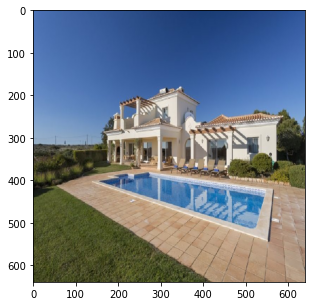


Predictions for image room_141.jpg: 


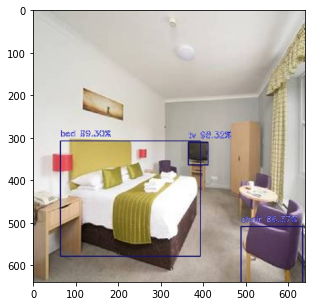

bed  :  99.29761290550232
chair  :  86.37310862541199
tv  :  98.31855297088623

Predictions for image room_18.jpg: 


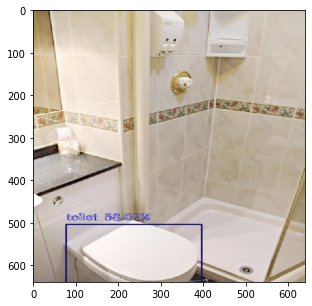

toilet  :  58.07226300239563

Predictions for image room_205.jpg: 


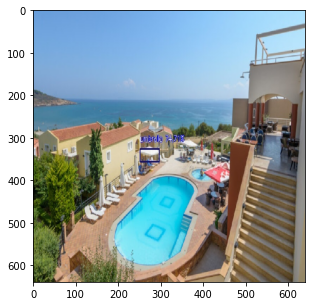

umbrella  :  74.7098445892334

Predictions for image room_26.jpg: 


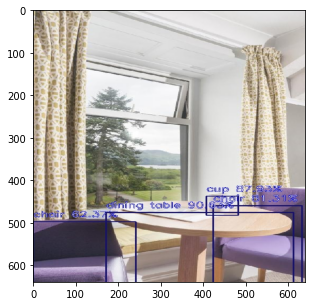

chair  :  81.30953907966614
chair  :  62.36962080001831
dining table  :  90.62833189964294
cup  :  87.93175220489502

Predictions for image room_291.jpg: 


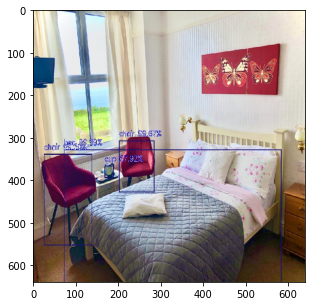

bed  :  99.89408850669861
chair  :  99.66877102851868
chair  :  99.30201172828674
cup  :  67.91598200798035

Predictions for image room_3.jpg: 


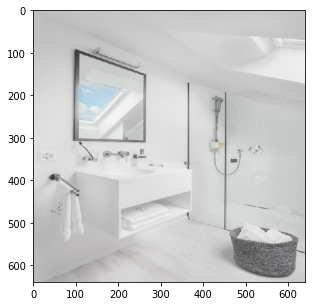


Predictions for image room_35.jpg: 


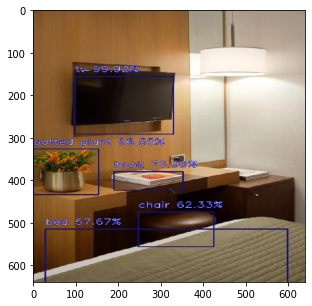

tv  :  99.92281794548035
bed  :  57.666581869125366
potted plant  :  96.55295610427856
book  :  76.98522210121155
chair  :  62.330424785614014

Predictions for image room_398.jpg: 


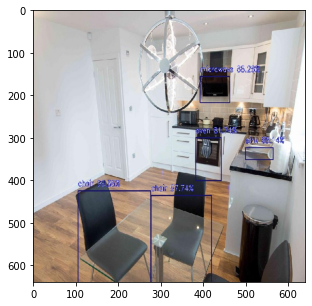

chair  :  99.85857605934143
chair  :  97.73765206336975
oven  :  81.74077868461609
microwave  :  88.2835865020752
sink  :  65.1378870010376

Predictions for image room_4.jpg: 


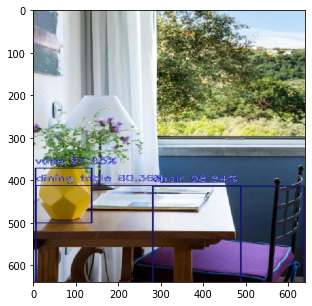

dining table  :  80.35585880279541
chair  :  98.83976578712463
vase  :  97.84833192825317

Predictions for image room_57.jpg: 


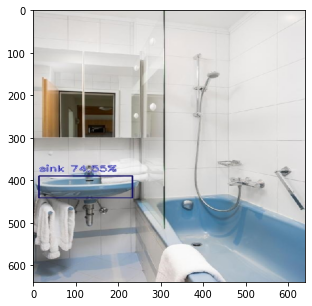

sink  :  74.54518675804138

Predictions for image room_62.jpg: 


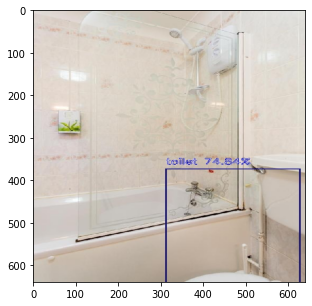

toilet  :  74.83879923820496

Predictions for image room_63.jpg: 


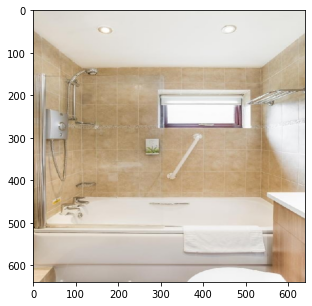


Predictions for image room_646.jpg: 


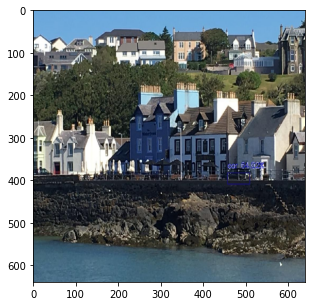

car  :  64.02326822280884

Predictions for image room_72.jpg: 


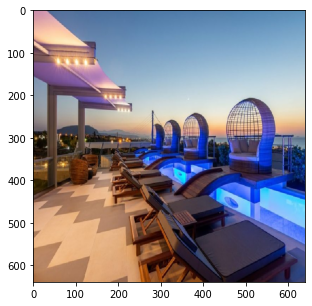


Predictions for image room_75.jpg: 


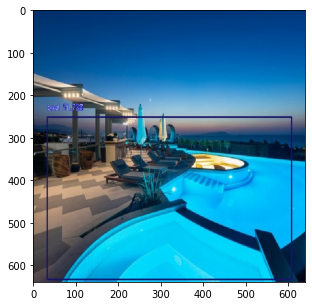

boat  :  51.72198414802551

Predictions for image room_754.jpg: 


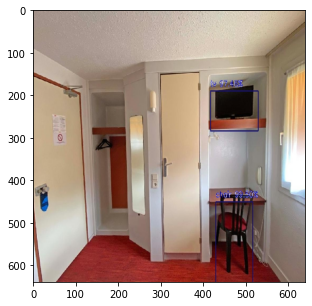

tv  :  97.46423959732056
chair  :  99.50034022331238

Predictions for image room_76.jpg: 


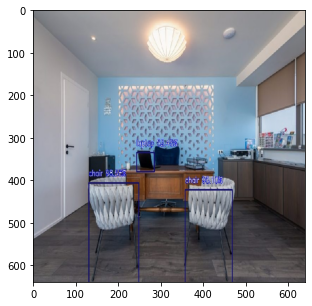

chair  :  98.57733845710754
chair  :  95.10037302970886
laptop  :  52.45556831359863

Predictions for image room_78.jpg: 


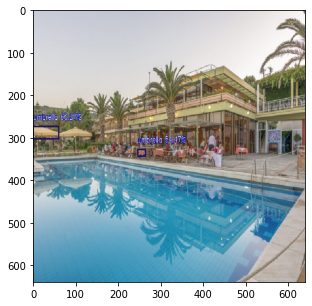

umbrella  :  63.26691508293152
umbrella  :  54.47388291358948

Predictions for image room_822.jpg: 


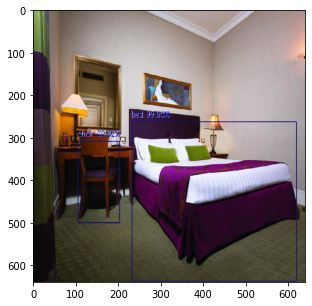

bed  :  99.95425343513489
chair  :  99.82381463050842

Predictions for image room_96.jpg: 


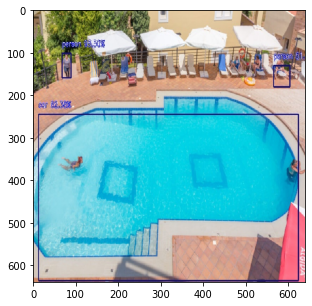

car  :  62.37959265708923
person  :  95.4957902431488
person  :  51.50339603424072

Predictions for image room_97.jpg: 


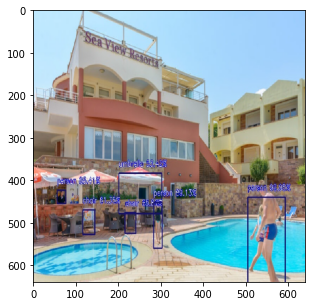

umbrella  :  53.42382192611694
person  :  99.95433688163757
person  :  85.41211485862732
chair  :  61.35163903236389
chair  :  65.86100459098816
person  :  89.13381695747375



In [11]:
# Make predictions on test images and view the results  
for i in glob.glob("/DataScience/Hotel_images_object_detection/test_images/*.jpg"):
    img = load_img(i,target_size=(640,640))
    file_name = os.path.basename(i)
    print('Predictions for image {}: '.format(file_name))
    detections = detector.detectObjectsFromImage(input_image=os.path.join('/DataScience/Hotel_images_object_detection/test_images', file_name), 
                                                 output_image_path=os.path.join("/DataScience/Hotel_images_object_detection/test_images/predictions" , 'new_'+ file_name))
    
    new_img = load_img(os.path.join("/DataScience/Hotel_images_object_detection/test_images/predictions" , 'new_'+ file_name),target_size=(640,640))
    plt.figure(figsize=(10,5))
    plt.imshow(new_img)
    plt.show()
    
    for eachObject in detections:
        print(eachObject["name"] , " : " , eachObject["percentage_probability"] )
    print('')

Processed pictures with boxes for detected objects are saved in the separate folder `predictions`.

From the test on our sample images we can see that in general object detection of trained classes works. From  quick review we can see that predictions for the following classes worked pretty well: bed, dining table, toilet, tv, laptop, sink. There are few undetected objects on the photos, for example a glass table (`room_398.jpg`) and sink (`room_3.jpg`). 

Overall the results of detection of trained classes are pretty good, but they are limited to only 80 classes in the pre-trained model, which will be not enough to achieve the goal of predicting hotel amenities. Let's explore other pre-trained models with more classes available for prediction.  

# 7.  Image Classification with ResNet-50

Another approach to solve the given task is to use the image classification model. The model takes images as input and classifies the major object in the image into a set of pre-defined classes.

There are few pre-trained models that we can apply, but here we will try [ResNet-50](https://github.com/onnx/models/tree/master/vision/classification/resnet). 

It is a pretrained Deep Learning model for image classification of the Convolutional Neural Network (CNN, or ConvNet), which is a class of deep neural networks, most commonly applied to analyzing visual imagery. ResNet-50 is 50 layers deep and is trained on a million images of 1000 categories from the ImageNet database. Furthermore the model has over 23 million trainable parameters, which indicates a deep architecture that makes it better for image recognition. Using a pretrained model is a highly effective approach, compared if you need to build it from scratch, where you need to collect great amounts of data and train it yourself. Of course, there are other pretrained deep models to use such as AlexNet, GoogleNet or VGG19, but the ResNet-50 is noted for excellent generalization performance with fewer error rates on recognition tasks and is therefore a useful tool to know. ResNet models provide very high accuracies with affordable model sizes. They are ideal for cases when high accuracy of classification is required.

Here we can approach a task in two ways: 
- use a pre-trained model with 1000 classes;
- perform additional training of the model so it can learn to predict custom classes.

The list of classes that pre-trained model can predict can be reviewed [here](https://github.com/onnx/models/blob/master/vision/classification/synset.txt).

Among 1000 classes in pre-trained model there are few classes that can useful for our use case, for example:
- n03179701 desk
- n04344873 studio couch, day bed
- n03761084 microwave, microwave oven
- n02808440 bathtub, bathing tub, bath, tub
- n04447861 toilet seat
- n04070727 refrigerator, icebox
- n04404412 television, television system
- n09428293 seashore, coast, seacoast, sea-coast

But still some of important classes that we want to predict are missing, for example: swimming pool, coffeemaker, balcony, etc. 

In this section we will test pre-trained Image Classification model ResNet-50 on the sample of real hotel photos following the instructions from this [article](https://medium.com/@nina95dan/simple-image-classification-with-resnet-50-334366e7311a).

In [12]:
# Import libraries for using ResNet-50 model
import numpy as np
import glob
from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.resnet50 import ResNet50

In [13]:
# Load model
model = ResNet50(weights='imagenet')

Predictions for image room_128.jpg: 


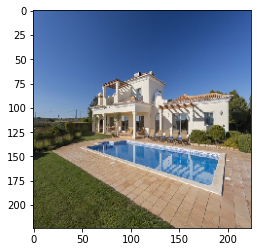

Predicted: [('n03899768', 'patio', 0.89048094), ('n03781244', 'monastery', 0.022911957), ('n03877845', 'palace', 0.014577176), ('n02788148', 'bannister', 0.008702769), ('n02859443', 'boathouse', 0.0069956467)]

Predictions for image room_141.jpg: 


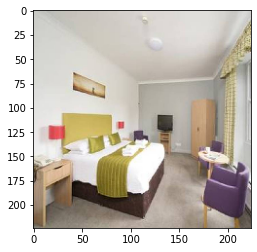

Predicted: [('n04344873', 'studio_couch', 0.31461), ('n03201208', 'dining_table', 0.15464151), ('n03179701', 'desk', 0.07252389), ('n04081281', 'restaurant', 0.059860036), ('n04550184', 'wardrobe', 0.033949796)]

Predictions for image room_18.jpg: 


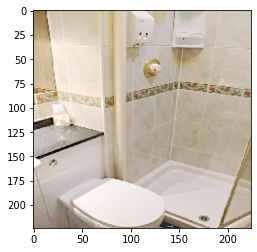

Predicted: [('n04447861', 'toilet_seat', 0.7414475), ('n02808440', 'bathtub', 0.09665407), ('n04493381', 'tub', 0.09467764), ('n04209239', 'shower_curtain', 0.047673877), ('n04553703', 'washbasin', 0.015314524)]

Predictions for image room_205.jpg: 


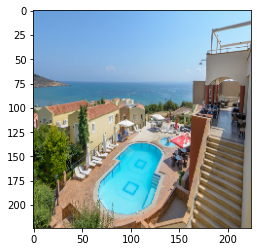

Predicted: [('n03899768', 'patio', 0.7181355), ('n09428293', 'seashore', 0.14840028), ('n02747177', 'ashcan', 0.02847313), ('n09399592', 'promontory', 0.017505657), ('n03160309', 'dam', 0.008537277)]

Predictions for image room_26.jpg: 


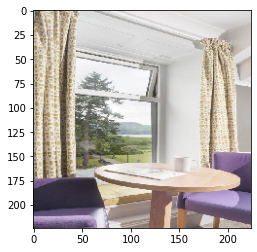

Predicted: [('n03388549', 'four-poster', 0.49861374), ('n04590129', 'window_shade', 0.11971923), ('n03788365', 'mosquito_net', 0.0836945), ('n03201208', 'dining_table', 0.071552895), ('n04344873', 'studio_couch', 0.057376053)]

Predictions for image room_291.jpg: 


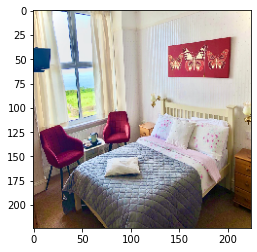

Predicted: [('n04033995', 'quilt', 0.7598297), ('n04344873', 'studio_couch', 0.18699796), ('n03388549', 'four-poster', 0.033470597), ('n03788365', 'mosquito_net', 0.016556257), ('n03131574', 'crib', 0.0011669525)]

Predictions for image room_3.jpg: 


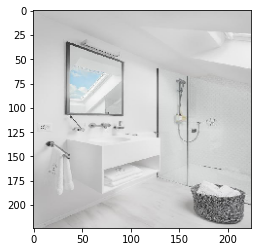

Predicted: [('n02808440', 'bathtub', 0.51025987), ('n04553703', 'washbasin', 0.31287432), ('n03742115', 'medicine_chest', 0.07878636), ('n04493381', 'tub', 0.058140084), ('n04209239', 'shower_curtain', 0.009993537)]

Predictions for image room_35.jpg: 


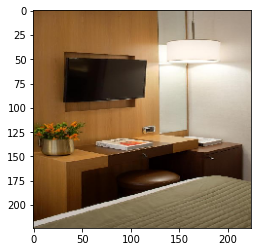

Predicted: [('n03529860', 'home_theater', 0.8505193), ('n03290653', 'entertainment_center', 0.047419973), ('n04404412', 'television', 0.018746924), ('n04590129', 'window_shade', 0.0067887087), ('n03691459', 'loudspeaker', 0.0061951936)]

Predictions for image room_398.jpg: 


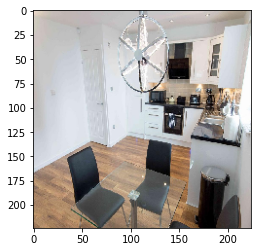

Predicted: [('n03201208', 'dining_table', 0.7044724), ('n04070727', 'refrigerator', 0.042904913), ('n04065272', 'recreational_vehicle', 0.021669084), ('n02791124', 'barber_chair', 0.02066955), ('n03761084', 'microwave', 0.017769597)]

Predictions for image room_4.jpg: 


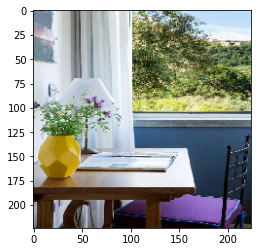

Predicted: [('n03899768', 'patio', 0.23002166), ('n03991062', 'pot', 0.17246534), ('n03201208', 'dining_table', 0.10192267), ('n02699494', 'altar', 0.048288994), ('n04239074', 'sliding_door', 0.039362088)]

Predictions for image room_57.jpg: 


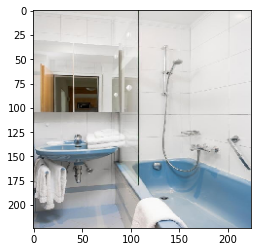

Predicted: [('n02808440', 'bathtub', 0.55315095), ('n04553703', 'washbasin', 0.34973538), ('n04447861', 'toilet_seat', 0.051684458), ('n04493381', 'tub', 0.035599764), ('n03742115', 'medicine_chest', 0.006240733)]

Predictions for image room_62.jpg: 


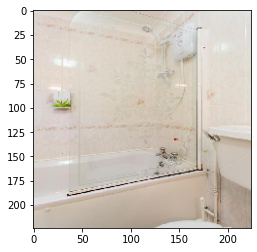

Predicted: [('n02808440', 'bathtub', 0.59080166), ('n04493381', 'tub', 0.40323305), ('n04209239', 'shower_curtain', 0.0038215076), ('n04553703', 'washbasin', 0.0009827752), ('n03742115', 'medicine_chest', 0.0005411007)]

Predictions for image room_63.jpg: 


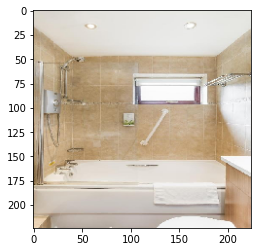

Predicted: [('n02808440', 'bathtub', 0.48215705), ('n04493381', 'tub', 0.2501708), ('n04553703', 'washbasin', 0.20216253), ('n04447861', 'toilet_seat', 0.039349303), ('n03742115', 'medicine_chest', 0.0138946725)]

Predictions for image room_646.jpg: 


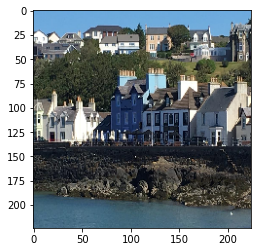

Predicted: [('n02980441', 'castle', 0.5607188), ('n02894605', 'breakwater', 0.06679705), ('n02814860', 'beacon', 0.055160854), ('n03216828', 'dock', 0.05164625), ('n03220513', 'dome', 0.043488845)]

Predictions for image room_72.jpg: 


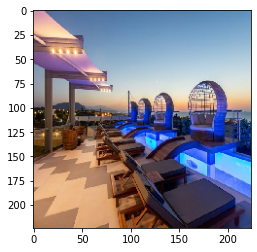

Predicted: [('n03899768', 'patio', 0.5332419), ('n04081281', 'restaurant', 0.101713754), ('n03782006', 'monitor', 0.08038512), ('n04152593', 'screen', 0.053751104), ('n03933933', 'pier', 0.04004692)]

Predictions for image room_75.jpg: 


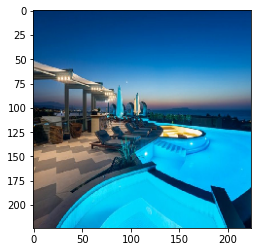

Predicted: [('n02795169', 'barrel', 0.36505067), ('n03899768', 'patio', 0.2591346), ('n04049303', 'rain_barrel', 0.22391866), ('n03220513', 'dome', 0.020766988), ('n02859443', 'boathouse', 0.013191253)]

Predictions for image room_754.jpg: 


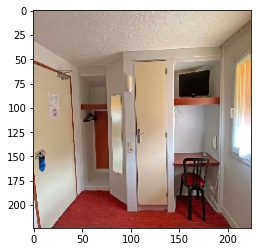

Predicted: [('n04239074', 'sliding_door', 0.17594038), ('n02788148', 'bannister', 0.16828567), ('n03742115', 'medicine_chest', 0.11220372), ('n04550184', 'wardrobe', 0.09480615), ('n04005630', 'prison', 0.08574453)]

Predictions for image room_76.jpg: 


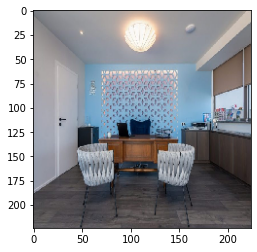

Predicted: [('n03899768', 'patio', 0.39096954), ('n03201208', 'dining_table', 0.3371056), ('n02791270', 'barbershop', 0.06433454), ('n04040759', 'radiator', 0.061249267), ('n04081281', 'restaurant', 0.034238502)]

Predictions for image room_78.jpg: 


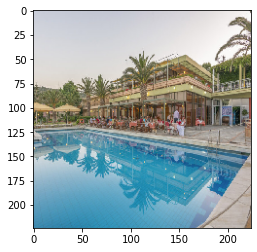

Predicted: [('n09428293', 'seashore', 0.4514853), ('n09332890', 'lakeside', 0.26313892), ('n04507155', 'umbrella', 0.058851745), ('n03216828', 'dock', 0.034744028), ('n03388043', 'fountain', 0.02472349)]

Predictions for image room_822.jpg: 


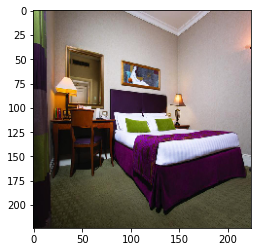

Predicted: [('n04033995', 'quilt', 0.25326025), ('n04344873', 'studio_couch', 0.21296632), ('n03201208', 'dining_table', 0.16529052), ('n04081281', 'restaurant', 0.090627454), ('n03388549', 'four-poster', 0.042883422)]

Predictions for image room_96.jpg: 


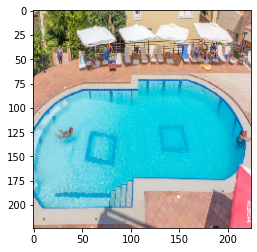

Predicted: [('n03899768', 'patio', 0.516397), ('n04493381', 'tub', 0.064589255), ('n04081281', 'restaurant', 0.04674573), ('n06794110', 'street_sign', 0.04307457), ('n02807133', 'bathing_cap', 0.04085206)]

Predictions for image room_97.jpg: 


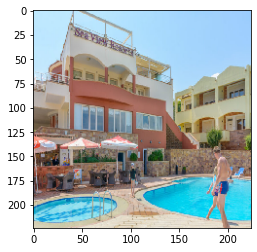

Predicted: [('n03899768', 'patio', 0.3646463), ('n04371430', 'swimming_trunks', 0.272133), ('n03388043', 'fountain', 0.12080424), ('n09428293', 'seashore', 0.06455162), ('n09421951', 'sandbar', 0.058776386)]



In [14]:
# Get images file path 
# Preprocess images for ResNet-50. When loading the picture we need to set the right target size which for ResNet is 224*224.

for i in glob.glob("/DataScience/Hotel_images_object_detection/test_images/*.jpg"):
    img = load_img(i, target_size = (224, 224))
    print('Predictions for image {}: '.format(os.path.basename(i)))
    plt.imshow(img)
    plt.show()
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    preds = model.predict(img)
    print('Predicted:', decode_predictions(preds, top=5)[0])
    print('')

We can see from the results that some predictions are useful for the purpose of our project, for example:  
- 'seashore' - 0.14840028, 
- 'studio_couch' - 0.18699796, 
- 'television' - 0.018746924, 
- 'bathtub' - 0.51025987,
- 'dining_table' - 0.7044724, 
- kitchen appliances: 'refrigerator' - 0.042904913, 'microwave' - 0.017769597. 

But also model were unable to recognize a class 'desk' on all photos and we can see that for almost all useful classes predictions have pretty low confidence as well as there are many not accurate classification results.

Clearly to solve our task we will need to perform additional training ResNet-50 model to improve results for existing classes and train model to classify other classes that we need. 

Since for our sample photos results of object detection model seem to be better, in the next section we will perform custom training for this type of the model. 

# 8. Training of custom object-detection model based on YOLOv5

With pre-trained models we were unable to fully solve the task, both image detection model that we tried in step 6 and image classification model from step 7, don't have some important classes that we need to detect from the photos. 

For example, I haven't found trained model which can detect swimming pool, coffeemaker, balcony, garden. Also predictions of desks worked  poorly with pre-trained image classification model.

In this section we will explore how we can train custom object-detection model based on the pre-trained model YOLOv5. Yolo V5 is one of the best available models for Object Detection at the moment. The great thing about this Deep Neural Network is that it is very easy to retrain the network on your own custom dataset.

YOLOv5 combines bounding box prediction and object classification. It is the first of the YOLO models to be written in the PyTorch framework and it is much more lightweight and easy to use. YOLOv5 does not outperform YOLOv4 on a common benchmark, the COCO dataset, but it's easier to get started with and it offers   better development speed when moving into deployment.

## 8.1. Prepare data for training

First step in implementing custom object-detection model is to get training data. 

To train the model we will use `Open Images Dataset v4`, a dataset of 9.2M images with unified annotations for image classification, object detection and visual relationship detection. `Open Images V4` offers large scale across several dimensions: 30.1M image-level labels for 19.8k concepts, **15.4M bounding boxes for 600 object classes**, and 375k visual relationship annotations involving 57 classes. 

We can review annotated 600 classes for object detection [here](https://storage.googleapis.com/openimages/2017_07/bbox_labels_vis/bbox_labels_vis.html).

In the dataset we have such useful for us classes as:
- Desk,
- Coffeemaker,
- Swimming pool, etc.

For this project we will train a custom object detection model to detect 'Swimming pool' class. Results can serve as proof-of-concept and it will be possible to extend number of classes for model training if results of this test run is satisfying. 

To create a custom dataset for training and load only necessary data [OIDv4_ToolKit](https://github.com/EscVM/OIDv4_ToolKit) was used. This tool is useful as it provides an easy to use downloader which allows to filter the data we want to get from `Open Images V4` and stores it in the folder structure. 

The instructions are available in [GitHub repository](https://github.com/EscVM/OIDv4_ToolKit), also [this article](https://towardsdatascience.com/build-a-custom-open-images-dataset-for-object-detection-9eab73b6a410) can be helpful in the process.

For this project following steps were performed:
1. Clone this repository
<pre> git clone https://github.com/EscVM/OIDv4_ToolKit.git </pre>

2. Install the required packages
<pre> pip3 install -r requirements.txt  </pre>

3. Download images of 'Swimming pool' class by opening Anaconda Prompt, navigating to the folder where repository was cloned and running following command:
<pre> python3 main.py downloader --classes swimming_pool --type_csv all </pre>
Note: running this command in Jupyter notebook returned error.

   This command will create following folders by the path `..\OIDv4_ToolKit\OID\Dataset`: test, train, validation. Each folder will contain images in `.jpg` format and `Labels` folder with annotations in `.txt` format. It's also possible to download only train or validation or test data, as well as different classes (several classes together or separately). For the sake of simplicity, in this project we will focus on training model to detect only one class - `Swimming pool`. 

## 8.2. Train custom object-detection YOLOv5 model to detect `Swimming pool` class

The guidances on how to train custom object-detection YOLOv5 model from [this article](https://towardsdatascience.com/how-to-train-a-custom-object-detection-model-with-yolo-v5-917e9ce13208) can be useful. 

Training of the model was performed in GoogleColab due to availability of better GPU resources for faster training. The GoogleColab notebook can be accessed via the [link](https://colab.research.google.com/drive/1EfoxoyXrMOWmJo-kiM59FOmHE-9bdw5H?usp=sharing).

In GoogleColab following steps were performed:
0. Archive and upload the Custom Dataset to GoogleDrive.
1. Install Dependencies and clone repository with Yolo v5 model.
2. Download Custom Dataset it the notebook and `data.yaml` file.
3. Data preprocessing. Change format of labels in `txt` files to YOLO format, which is described [here](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data) and change size of images.
    - In this step no additional processing and augmentation  for images was performed. It's possible to explore if model can be improved by applying additional preprocessing steps. 
4. Define Model Configuration and Architecture.
    - In this step we define number of classes for model training (for this test just 1 class) and don't change other standard parameters of the model.
    - The model yolov5l was chosen. More information about YOLO models can be found [here](https://github.com/ultralytics/yolov5). The chosen checkpoint still has pretty fast speed and higher accuracy.
    ![](https://user-images.githubusercontent.com/26833433/114313216-f0a5e100-9af5-11eb-8445-c682b60da2e3.png)
    
5. Train Custom YOLOv5 Detector for 300 epochs.
6. Evaluate Custom YOLOv5 Detector Performance.

    Performance metrics that we got on validation dataset:
    -	Precision and Recall are about 90%+.
    -	`mAP@0.5`(mean Average Precision when IoU is set to 0.5) seems to be to also be pretty high – about 95%.
    -	`mAP@0.05:0.95` (mean Average Precision when IoU is set to the range from 0.5 to 0.95) is expectedly lower, but still reaches almost 80%. For our use case it’s important to detect if the object is in the picture and we care less about precision of box detection, so results from this metric seem to be acceptable. 
7. Run Inference on test set with trained Weights.

    Performance metrics on the test dataset do not differ much:
    - Precision is 96.3%.
    - Recall is 90.8%.
    - `mAP@0.5` is 94.7%.
    - `mAP@0.05:0.95` is 77.4%.

## 8.3. Detect `Swimming pool` with custom object-detection YOLOv5 model for hotel photos sample

In [8]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5 
    
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

A:\DataScience\Hotel_images_object_detection\yolov5\yolov5\yolov5


Cloning into 'yolov5'...


HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [9]:
# install dependencies as necessary
!pip install -qr requirements.txt  

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Anna\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Anna\\AppData\\Local\\Temp\\pip-install-9rpabpbx\\pycocotools_ae28887d10ac4896b76869d3a63eedd1\\setup.py'"'"'; __file__='"'"'C:\\Users\\Anna\\AppData\\Local\\Temp\\pip-install-9rpabpbx\\pycocotools_ae28887d10ac4896b76869d3a63eedd1\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Anna\AppData\Local\Temp\pip-wheel-rzt2ec1_'
       cwd: C:\Users\Anna\AppData\Local\Temp\pip-install-9rpabpbx\pycocotools_ae28887d10ac4896b76869d3a63eedd1\
  Complete output (16 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.

In [14]:
import glob, os

In [15]:
import cv2

# Resize sample images and save copies
target_width, target_height = 640,640
images = glob.glob(r'A:\DataScience\Hotel_images_object_detection\test_images\*.jpg')

for img in images:
    file_name = os.path.basename(img)
    image = cv2.imread(img)
    image = cv2.resize(image, (target_width, target_height)) 
    cv2.imwrite('/DataScience/Hotel_images_object_detection/test_images/resized_img/{}'.format(file_name), image)

In [ ]:
A:\DataScience\Hotel_images_object_detection\yolov5\custom_yolo_weights\weights

In [19]:
# Apply the model to predict `Swimming pool` class
%cd A:\DataScience\Hotel_images_object_detection\yolov5
!python detect.py --weights A:\DataScience\Hotel_images_object_detection\custom_yolo_weights\weights\best.pt --img 640 --conf 0.4 --source A:\DataScience\Hotel_imagies_object_detection\test_images

A:\DataScience\Hotel_images_object_detection\yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='A:\\DataScience\\Hotel_imagies_object_detection\\test_images', update=False, view_img=False, weights=['A:\\DataScience\\Hotel_images_object_detection\\custom_yolo_weights\\weights\\best.pt'])


Traceback (most recent call last):
  File "detect.py", line 167, in <module>
    check_requirements()
  File "A:\DataScience\Hotel_images_object_detection\yolov5\utils\general.py", line 92, in check_requirements
    pkg_resources.require(requirements)  # DistributionNotFound or VersionConflict exception if requirements not met
  File "C:\Users\Anna\anaconda3\lib\site-packages\pkg_resources\__init__.py", line 899, in require
    needed = self.resolve(parse_requirements(requirements))
  File "C:\Users\Anna\anaconda3\lib\site-packages\pkg_resources\__init__.py", line 785, in resolve
    raise DistributionNotFound(req, requirers)
pkg_resources.DistributionNotFound: The 'pycocotools>=2.0' distribution was not found and is required by the application


Predictions for image room_128.jpg: 


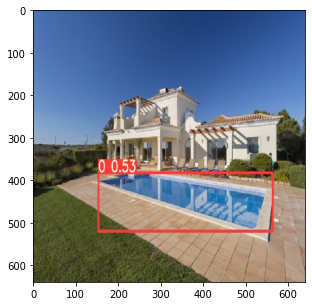

Predictions for image room_141.jpg: 


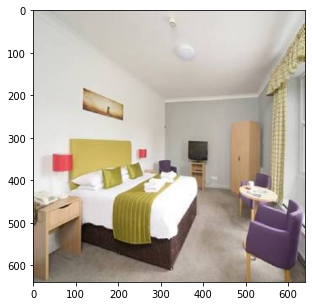

Predictions for image room_18.jpg: 


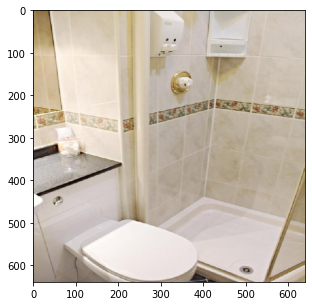

Predictions for image room_205.jpg: 


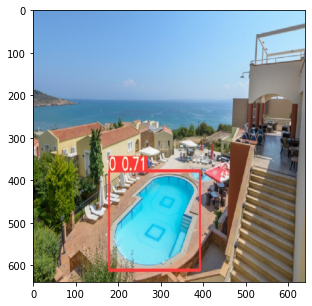

Predictions for image room_26.jpg: 


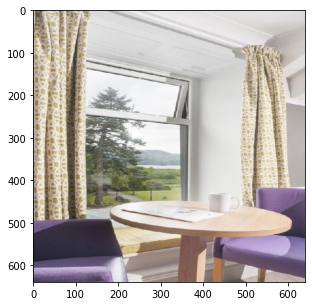

Predictions for image room_291.jpg: 


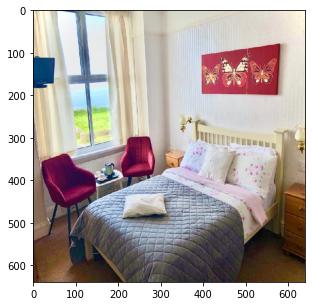

Predictions for image room_3.jpg: 


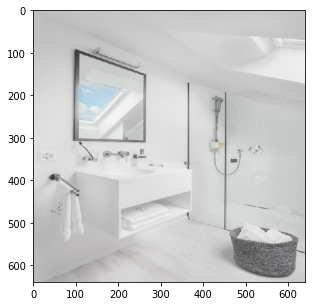

Predictions for image room_35.jpg: 


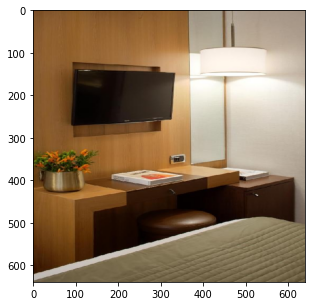

Predictions for image room_398.jpg: 


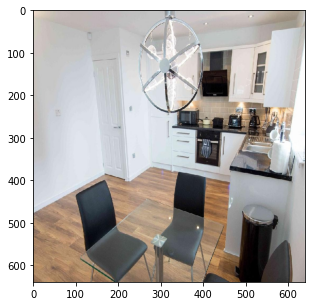

Predictions for image room_4.jpg: 


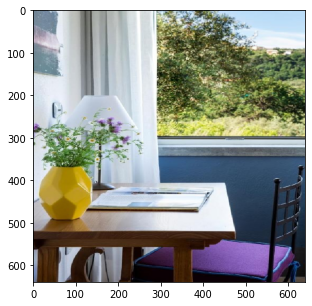

Predictions for image room_57.jpg: 


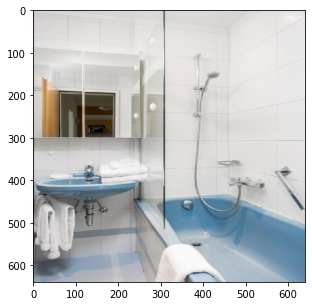

Predictions for image room_62.jpg: 


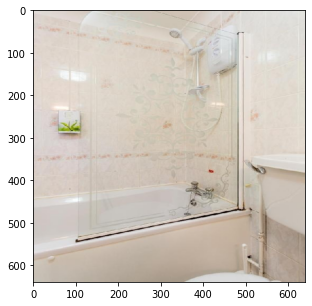

Predictions for image room_63.jpg: 


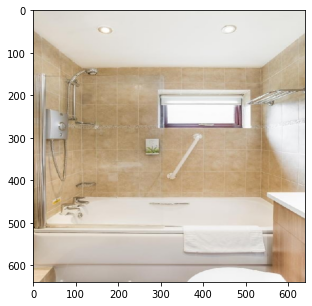

Predictions for image room_646.jpg: 


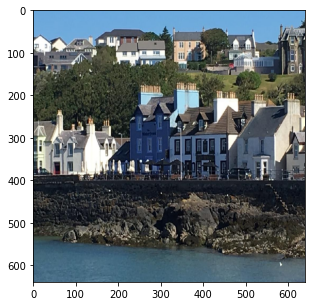

Predictions for image room_72.jpg: 


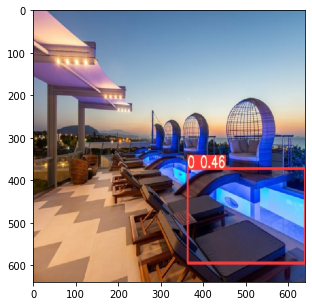

Predictions for image room_75.jpg: 


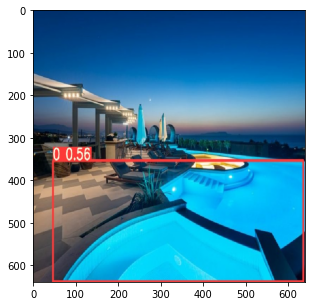

Predictions for image room_754.jpg: 


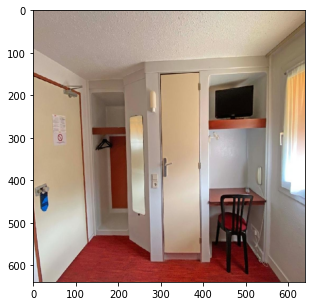

Predictions for image room_76.jpg: 


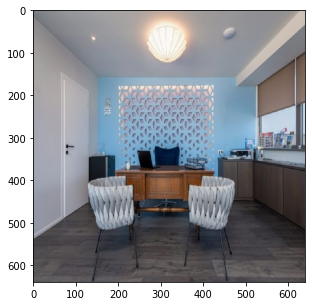

Predictions for image room_78.jpg: 


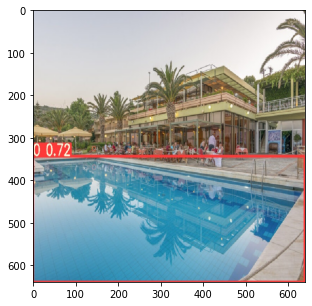

Predictions for image room_822.jpg: 


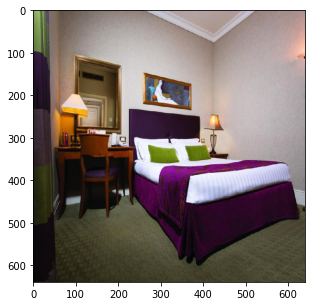

Predictions for image room_96.jpg: 


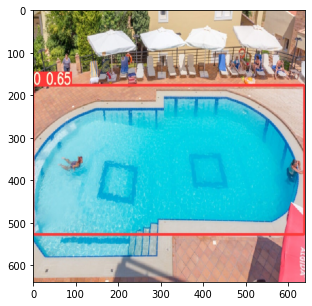

Predictions for image room_97.jpg: 


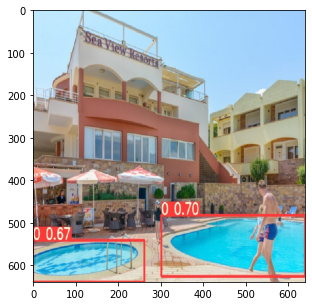

In [19]:
# Display images with detected swimming pools

for i in glob.glob("/DataScience/Hotel_images_object_detection/yolov5/runs/detect/exp9/*.jpg"):
    img = load_img(i, target_size = (640, 640))
    print('Predictions for image {}: '.format(os.path.basename(i)))
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()

From processed sample images we can see that overall results are pretty good, model was able to detect all pools and boxes detection also seem to be pretty accurate.

   Even for tricky images model detected objects correctly:
- `room_646.jpg` image contains with river or sea, but model correctly didn't detect a pool in it,
- in `room_72.jpg` image  pool was detected correctly, even though we can see that it is not standard one.
   
   For the future steps it's recommended to explore if deeper image preprocessing and augmentation can help to improve results. Also it's important to explore where a model makes mistakes. Intuitively I would guess that differentiating between sea/river/pool/bathtub can be tricky and it's possible that hotel photos can often include both pool and sea/river photos. Possibly it's worth exploring how to overcome this challenge, maybe including seaside photo into training set can help model to learn the difference between two objects.

# 9. Conclusions and Recommendations

### In this project we explored how we can use models with pre-trained classes to predict hotels amenities:
-	 **pre-trained object detection model YOLOv3** pretrained on COCO dataset with 80 classes. 
    - *Pre-trained classes that can be useful for predicting hotel amenities*: couch, bed, dining table, tv, hair dryer, kitchen appliances: microwave, oven, toaster, sink, refrigerator.
    - *Classes that are not available in the pre-trained model and that we want to predict*: swimming pool, desk, coffeemaker, bathtub, balcony, garden.
    - *Results of applying pre-trained model on the sample of real hotel photos*: manual visual check showed that in general object detection of trained classes works pretty well, model was able to detect following classed: bed, dining table, toilet, tv, laptop, sink.
-	**pre-trained image classification model ResNet-50** pretrained on ImageNet database with 1000 classes. 
    - *Pre-trained classes that can be useful for predicting hotel amenities*: desk, studio couch, dining table, bathtub, television, seashore, kitchen appliances: microwave, refrigerator.
    - *Classes that are not available in the pre-trained model and that we want to predict*: swimming pool, coffeemaker, balcony, garden.
    - *Results of applying pre-trained model on the sample of real hotel photos*: manual visual check showed that model didn’t perform well on the sample photos. Some predictions are useful for the purpose of our project, model was able to classify following classes: seashore, studio_couch, television, bathtub, dining_table, refrigerator, microwave. But prediction confidence for the majority if these classes is very low (<20%), model were unable to classify some photos and to recognize a class 'desk' on all photos.

Since ready-to-use models can’t fully solve our task, we performed **custom training of object detection model YOLOv5** that was pre-trained on the COCO dataset. It was decided to perform training for object detection model as this type of pre-trained model provided better results on the sample of real hotel photos.

To train the model we used `Open Images Dataset v4` dataset with annotated 600 classes. This dataset contains following useful for us classes: swimming pool, desk, kitchen appliances, coffeemaker, television, bathtub. Following classes are not found in this dataset: balcony, garden.

### To test the process of custom model training in this project we decided to perform training for only one class and evaluate the results:
-	we downloaded annotated photos for `swimming pool` class using [OIDv4_ToolKit](https://github.com/EscVM/OIDv4_ToolKit);
-	prepared the data, set model configuration and performed model training for 300 epochs to detect `swimming pool`;
-	results on the validation set: 
    -	Precision and Recall are about 90%+;
    - mAP@0.5 (mean Average Precision when IoU is set to 0.5) is about 95%; 
    - mAP@0.05:0.95 (mean Average Precision when IoU is set to the range from 0.5 to 0.95) is almost 80%. 
-	results on the test set: 
    - Precision is 96.3%;
    - Recall is 90.8%;
    - mAP@0.5 is 94.7%;
    - mAP@0.05:0.95 is 77.4%.
-	manual check of results on the sample of real hotel photos: overall results are pretty good, model was able to detect all pools and boxes detection also seem to be pretty accurate.


## Recommendations on the further steps:
-	Define expected performance expectations of the model for business application;
-	Clarify list of amenities to predict;
-	Research ways to collect the data for model training with all amenities needed (in this project we used `Open Images Dataset v4`, but it doesn’t have data on two classes: balcony, garden): research available annotated datasets that can contain needed classes or ways to annotate custom dataset;
-	Prepare annotated test set (preferably based on real hotel pictures) to calculate metrics to objectively evaluate model performance and calculate baseline performance that can be used in the process of model tuning to systematically estimate model improvements; 
-	Explore if more extensive preprocessing and augmentation of images can improve the results;
-	Explore if hyper-parameters tuning of YOLOv5 model can improve the results;
-	Perform training of YOLOv5 model on extended dataset which contains data with all needed classes and evaluate the results;
